In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
train_data = pd.read_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\codes and dataset\\dataset\\train.csv")
test_data = pd.read_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\codes and dataset\\dataset\\test.csv")

In [4]:
print("This is training dataset:")
train_data.head()

This is training dataset:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("This is test dataset")
train_data.tail()

This is test dataset


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


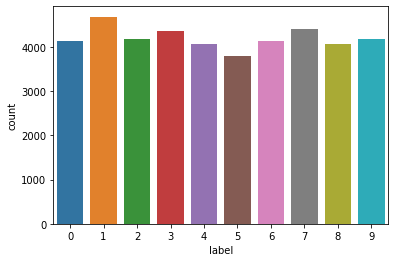

In [6]:
# To plot using seaborn library...
sns.countplot(train_data["label"])


In [7]:
#preprocessing part!!
row_pixels= train_data.drop(["label"], axis=1)
target_label = train_data["label"]

*****************This will display the image of any row specified in iloc******************************
This is the label for the given image in the dataset 1


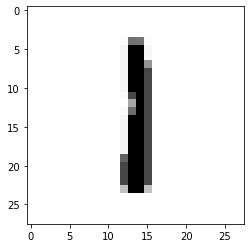

In [8]:
print("*****************This will display the image of any row specified in iloc******************************")
row_from_train_dataset =row_pixels.iloc[2]
row_from_train_dataset =row_from_train_dataset*255
image_display=row_from_train_dataset.values.reshape(28,28)
plt.imshow(image_display ,cmap=matplotlib.cm.binary,interpolation="nearest")
print("This is the label for the given image in the dataset" ,target_label[2] )

In [9]:
#Normalization of data (convert the data 0-255 -> values between 0 and 1)
row_pixels = row_pixels/255.0

In [10]:
print("This how data will look like:")
row_pixels.head()

This how data will look like:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
xtrain, xval, ytrain, yval = train_test_split(row_pixels, target_label, test_size=0.25, random_state=2019)

In [12]:
ytrain.head()

10629    2
35116    3
2701     5
24525    2
29457    4
Name: label, dtype: int64

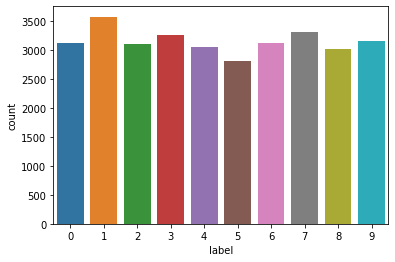

In [13]:
sns.countplot(ytrain)


In [14]:
model_using_rbf = SVC(C=400, kernel='rbf', random_state=2019, gamma="scale", verbose=True)

In [15]:
model_using_rbf.fit(xtrain, ytrain)


[LibSVM]

SVC(C=400, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2019, shrinking=True,
    tol=0.001, verbose=True)

In [16]:
predicted = model_using_rbf.predict(xval)
print(predicted)
print("accuracy", metrics.accuracy_score(yval, predicted)) 



[4 0 5 ... 1 9 8]
accuracy 0.9783809523809524


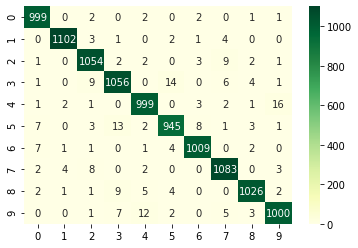

In [17]:
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(yval, predicted)), annot=True, cmap="YlGn", fmt='g')


In [18]:
test_data = test_data/255.0


In [19]:
y_predection = model_using_rbf.predict(test_data)


In [24]:
submission = {}
submission['ImageId'] = range(1,28001)
submission['Label'] = y_predection
submission = pd.DataFrame(submission)

submission = submission[['ImageId', 'Label']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\output\\submisision_rbf.csv", index=False)
print(submission['Label'].value_counts().sort_index())

0    2784
1    3205
2    2842
3    2764
4    2780
5    2513
6    2747
7    2885
8    2728
9    2752
Name: Label, dtype: int64


This is the label for the given image:  0


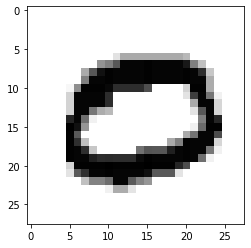

In [26]:
image_from_test_dataset=test_data.iloc[1]
image_from_test_dataset=image_from_test_dataset*255
image_display=image_from_test_dataset.values.reshape(28,28)
plt.imshow(image_display,cmap=matplotlib.cm.binary,interpolation="nearest")
print("This is the label for the given image: ", y_predection[1] )